In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Task 1

In [2]:
xlsx = pd.ExcelFile('Analyst_Excel_Test.xlsx')
population = pd.read_excel(xlsx, 'CA population data')

In [3]:
population.head()

,Name,Population
0,Acalanes Ridge,1137
1,Acampo,341
2,"Acton, CA",7596
3,Adelanto,32728
4,Adin-Lookout,789


In [4]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [5]:
X_train = population.loc[:,['Population']]

In [6]:
km = KMeans(n_clusters=3)

In [7]:
cluster_assignments = km.fit_predict(X_train)
cluster_assignments[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

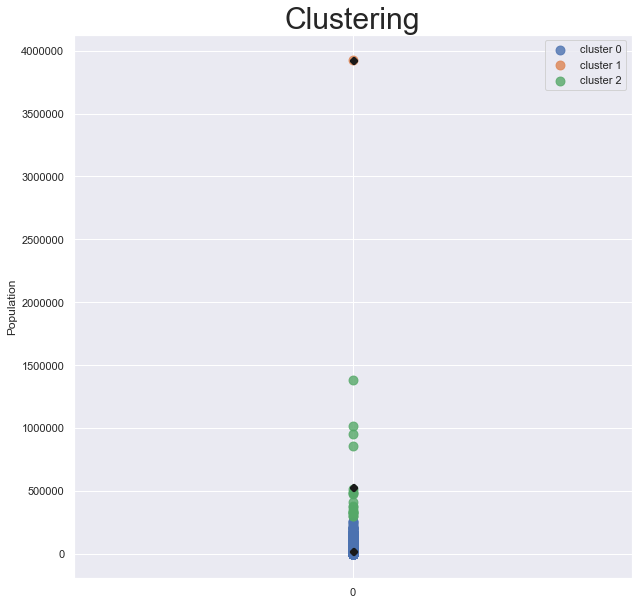

In [8]:
fig = plt.figure(figsize=(10,10))
for i in range(3):
    X_subset = X_train[cluster_assignments == i]
    plt.scatter(pd.Series(np.array(['0'] * len(X_subset))), X_subset.iloc[:,0],s = 80,alpha = 0.8, label = 'cluster '+str(i))
    plt.plot(km.cluster_centers_[i][0],marker='x',c='k', ms=5, mew=5, label=None);
_ = plt.legend();
_ = plt.ylabel('Population')
_ = plt.title('Clustering', fontdict = {'fontsize':30})

In [9]:
population['City Type'] = cluster_assignments
population.loc[population.Population > 600000, 'City Type'] = 1
population.loc[population['City Type'] == 1, 'City Type'] = 'big'
population.loc[population['City Type'] == 0, 'City Type'] = 'small'
population.loc[population['City Type'] == 2, 'City Type'] = 'medium'

In [10]:
len(population.loc[population['City Type'] == 'small'])

1463

In [11]:
len(population.loc[population['City Type'] == 'medium'])

14

In [12]:
len(population.loc[population['City Type'] == 'big'])

5

In [13]:
population.head()

,Name,Population,City Type
0,Acalanes Ridge,1137,small
1,Acampo,341,small
2,"Acton, CA",7596,small
3,Adelanto,32728,small
4,Adin-Lookout,789,small


In [14]:
len(population)

1482

In [15]:
population.to_excel(r'Population.xlsx', index = None, header=True)

In [16]:
# Name has blank in the tail

### Kmeans is sensitive to outliers. So we cut off the largest cities.

In [17]:
extra_big = population.loc[population.Population > 600000]
extra_big

,Name,Population,City Type
392,"East San Gabriel Valley, CA",952352,big
754,"Los Angeles, CA",3928864,big
1136,"San Diego, CA",1381069,big
1139,"San Francisco, CA",852469,big
1146,"San Jose, CA",1015785,big


In [18]:
population_cut = population.loc[population.Population < 600000].reset_index(drop = True)[['Name ', 'Population']]
X_train = population.loc[population.Population < 600000].reset_index(drop = True)[['Population']]

In [19]:
cluster_assignments = km.fit_predict(X_train)
cluster_assignments[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

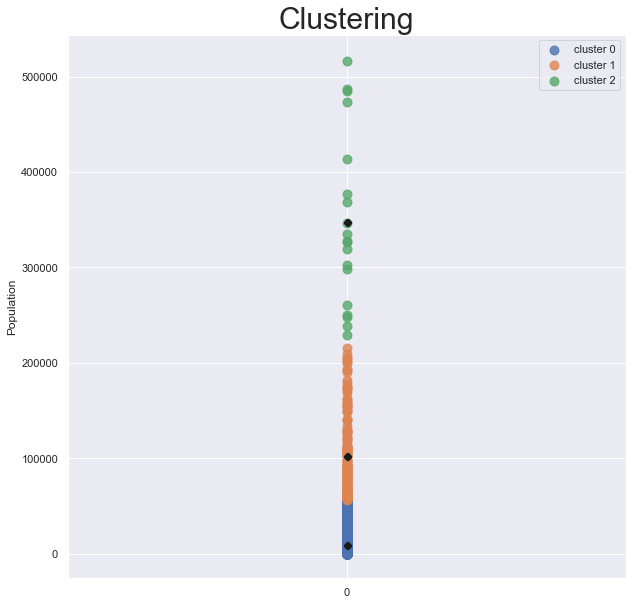

In [20]:
fig = plt.figure(figsize=(10,10))
for i in range(3):
    X_subset = X_train[cluster_assignments == i]
    plt.scatter(pd.Series(np.array(['0'] * len(X_subset))), X_subset.iloc[:,0],s = 80,alpha = 0.8, label = 'cluster '+str(i))
    plt.plot(km.cluster_centers_[i][0],marker='x',c='k', ms=5, mew=5, label=None);
_ = plt.legend();
_ = plt.ylabel('Population')
_ = plt.title('Clustering', fontdict = {'fontsize':30})

In [21]:
population_cut['City Type'] = cluster_assignments
population_cut.loc[population_cut['City Type'] == 1, 'City Type'] = 'medium'
population_cut.loc[population_cut['City Type'] == 0, 'City Type'] = 'small'
population_cut.loc[population_cut['City Type'] == 2, 'City Type'] = 'big'

In [22]:
len(population_cut.loc[population_cut['City Type'] == 'small'])

1290

In [23]:
len(population_cut.loc[population_cut['City Type'] == 'medium'])

168

In [24]:
len(population_cut.loc[population_cut['City Type'] == 'big'])

19

In [25]:
extra_big

,Name,Population,City Type
392,"East San Gabriel Valley, CA",952352,big
754,"Los Angeles, CA",3928864,big
1136,"San Diego, CA",1381069,big
1139,"San Francisco, CA",852469,big
1146,"San Jose, CA",1015785,big


In [26]:
# keep the order as original form
line1 = pd.DataFrame(extra_big.iloc[0]).T
line2 = pd.DataFrame(extra_big.iloc[1]).T
line3 = pd.DataFrame(extra_big.iloc[2]).T
line4 = pd.DataFrame(extra_big.iloc[3]).T
line5 = pd.DataFrame(extra_big.iloc[4]).T
population_final = pd.concat([population_cut.iloc[:392], line1, population_cut.iloc[392:753], line2,\
                           population_cut.iloc[753:1134], line3, population_cut.iloc[1134:1136], line4,\
                           population_cut.iloc[1136:1142], line5, population_cut.iloc[1142:]]).reset_index(drop=True)

In [27]:
len(population_final.loc[population_final['City Type'] == 'small'])

1290

In [28]:
len(population_final.loc[population_final['City Type'] == 'medium'])

168

In [29]:
len(population_final.loc[population_final['City Type'] == 'big'])

24

In [30]:
population_final.groupby(['City Type'])['Population'].max()

City Type
big       3928864
medium     215213
small       55466
Name: Population, dtype: int64

In [31]:
population_final.groupby(['City Type'])['Population'].min()

City Type
big       228758
medium     56784
small        201
Name: Population, dtype: int64

In [32]:
population_final.to_excel(r'Population_final.xlsx', index = None, header=True)

## Task 2

In [33]:
info = pd.read_excel(xlsx, 'RAW real estate data')
info.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [34]:
info.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [35]:
len(info)

985

In [36]:
population_final.head()

,Name,Population,City Type
0,Acalanes Ridge,1137,small
1,Acampo,341,small
2,"Acton, CA",7596,small
3,Adelanto,32728,small
4,Adin-Lookout,789,small


In [37]:
population_final.columns

Index(['Name ', 'Population', 'City Type'], dtype='object')

In [38]:
# delete ,CA and uppercase
for i in range(len(population_final)):
    if 'CA' in population_final.at[i, 'Name '].split(',')[-1]:
        population_final.at[i, 'Name '] = ''.join(population_final.at[i, 'Name '].split(',')[:-1])
    population_final.at[i, 'Name '] = population_final.at[i, 'Name '].upper()
population_final.head()

,Name,Population,City Type
0,ACALANES RIDGE,1137,small
1,ACAMPO,341,small
2,ACTON,7596,small
3,ADELANTO,32728,small
4,ADIN-LOOKOUT,789,small


In [39]:
new_info = pd.merge(info, population_final[['Name ', 'City Type']], left_on = 'city', right_on = 'Name ', how = 'left')
new_info.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Name,City Type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,SACRAMENTO,big
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,SACRAMENTO,big
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,SACRAMENTO,big
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,SACRAMENTO,big
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,SACRAMENTO,big


In [40]:
# check if there is null
new_info.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
Name         5
City Type    5
dtype: int64

In [41]:
new_info.loc[new_info['Name '].isnull()]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Name,City Type
142,1693 SHELTER COVE DR,GREENWOOD,95635,CA,3,2,2846,Residential,Wed May 21 00:00:00 EDT 2008,395000,38.945357,-120.908822,NaN,NaN
486,4885 SUMMIT VIEW DR,EL DORADO,95623,CA,3,2,1624,Residential,Mon May 19 00:00:00 EDT 2008,289000,38.673285,-120.879176,NaN,NaN
697,6320 EL DORADO ST,EL DORADO,95623,CA,2,1,1040,Residential,Fri May 16 00:00:00 EDT 2008,205000,38.678758,-120.844118,NaN,NaN
778,2341 BIG STRIKE TRL,COOL,95614,CA,3,2,1457,Residential,Fri May 16 00:00:00 EDT 2008,300000,38.905927,-120.975169,NaN,NaN
845,6401 MARSHALL RD,GARDEN VALLEY,95633,CA,3,2,0,Residential,Fri May 16 00:00:00 EDT 2008,490000,38.842550,-120.875400,NaN,NaN


In [42]:
# delete the null rows and drop duplicate columns
new_info = new_info.loc[new_info['Name '].notnull()].reset_index(drop = True)
len(new_info)

980

In [43]:
new_info.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,Name,City Type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,SACRAMENTO,big
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,SACRAMENTO,big
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,SACRAMENTO,big
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,SACRAMENTO,big
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,SACRAMENTO,big


In [44]:
new_info = new_info.drop(['Name '], axis = 1)
new_info.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,City Type
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,big
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,big
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,big
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,big
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,big


In [45]:
new_info.to_excel(r'Real Estate Data with City Type.xlsx', index = None, header=True)

In [46]:
# assumption: one bed in one bedroom
cal_metric = new_info[['City Type', 'type', 'beds', 'sq__ft', 'price']].groupby(['City Type', 'type']).mean()
cal_metric

beds       sq__ft          price
City Type type                                              
big       Condo         1.703704   871.629630  137690.703704
          Multi-Family  4.600000  2118.300000  214189.700000
          Residential   3.077114  1411.350746  201359.584577
medium    Condo         1.900000   722.200000  156214.450000
          Multi-Family  5.000000  2233.500000  246027.000000
          Residential   3.186047  1575.108527  296489.941860
small     Condo         0.857143   440.714286  180357.142857
          Multi-Family  2.000000   960.000000  285000.000000
          Residential   2.567460   979.412698  238943.464286
          Unkown        0.000000     0.000000  275000.000000

In [137]:
cal_metric.to_excel(r'Average Data.xlsx', index = True, header=True)

In [48]:
len(new_info.loc[new_info['type'] == 'Unkown'])

1